In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('Telco_Cusomer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Basic understanding of data

In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
df = data.copy()

In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

In [9]:
space_index = df[df['TotalCharges'].str.contains(' ')].index

In [10]:
for i in space_index:
    df.loc[i, 'TotalCharges'] = 0

In [11]:
## df['TotalCharges'].replace(to_replace=' ',value= '0', inplace = True)

In [12]:
df['TotalCharges'].str.contains(' ').sum()

0

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('--------')

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------
gender
['Female' 'Male']
--------
SeniorCitizen
[0 1]
--------
Partner
['Yes' 'No']
--------
Dependents
['No' 'Yes']
--------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------
PhoneService
['No' 'Yes']
--------
MultipleLines
['No phone service' 'No' 'Yes']
--------
InternetService
['DSL' 'Fiber optic' 'No']
--------
OnlineSecurity
['No' 'Yes' 'No internet service']
--------
OnlineBackup
['Yes' 'No' 'No internet service']
--------
DeviceProtection
['No' 'Yes' 'No internet service']
--------
TechSupport
['No' 'Yes' 'No internet service']
--------
StreamingTV
['No' 'Yes' 'No internet service']
--------
StreamingMovies
['No' 'Yes' 'No internet service']
--------
Contract
['Month-to-month' 'One year' 

In [16]:
df['SeniorCitizen'].replace({1:'Yes',0:'No'}, inplace=True)

In [17]:
df.drop('customerID', axis=1, inplace=True)

### Seperating numerical and catgorical data

In [18]:
num = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(include=object).columns.to_list()

### fetch outliers using IQR

In [19]:
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)

In [20]:
IQR = Q3 - Q1
IQR

tenure              46.00
MonthlyCharges      54.35
TotalCharges      3388.05
dtype: float64

In [21]:
lower_whis  = Q1 - (1.5*IQR)
lower_whis

tenure             -60.000
MonthlyCharges     -46.025
TotalCharges     -4683.525
dtype: float64

In [22]:
upper_whis = Q3 + (1.5*IQR)
upper_whis

tenure             124.000
MonthlyCharges     171.375
TotalCharges      8868.675
dtype: float64

In [23]:
outliers = df[((df[num] <lower_whis) | (df[num] > upper_whis)).any(axis=1)]
non_outliers = df[~((df[num] <lower_whis) | (df[num] > upper_whis)).any(axis=1)]

In [24]:
len(outliers)/len(df)*100

0.0

In [25]:
plt.rcParams['figure.figsize'] = [20, 10]

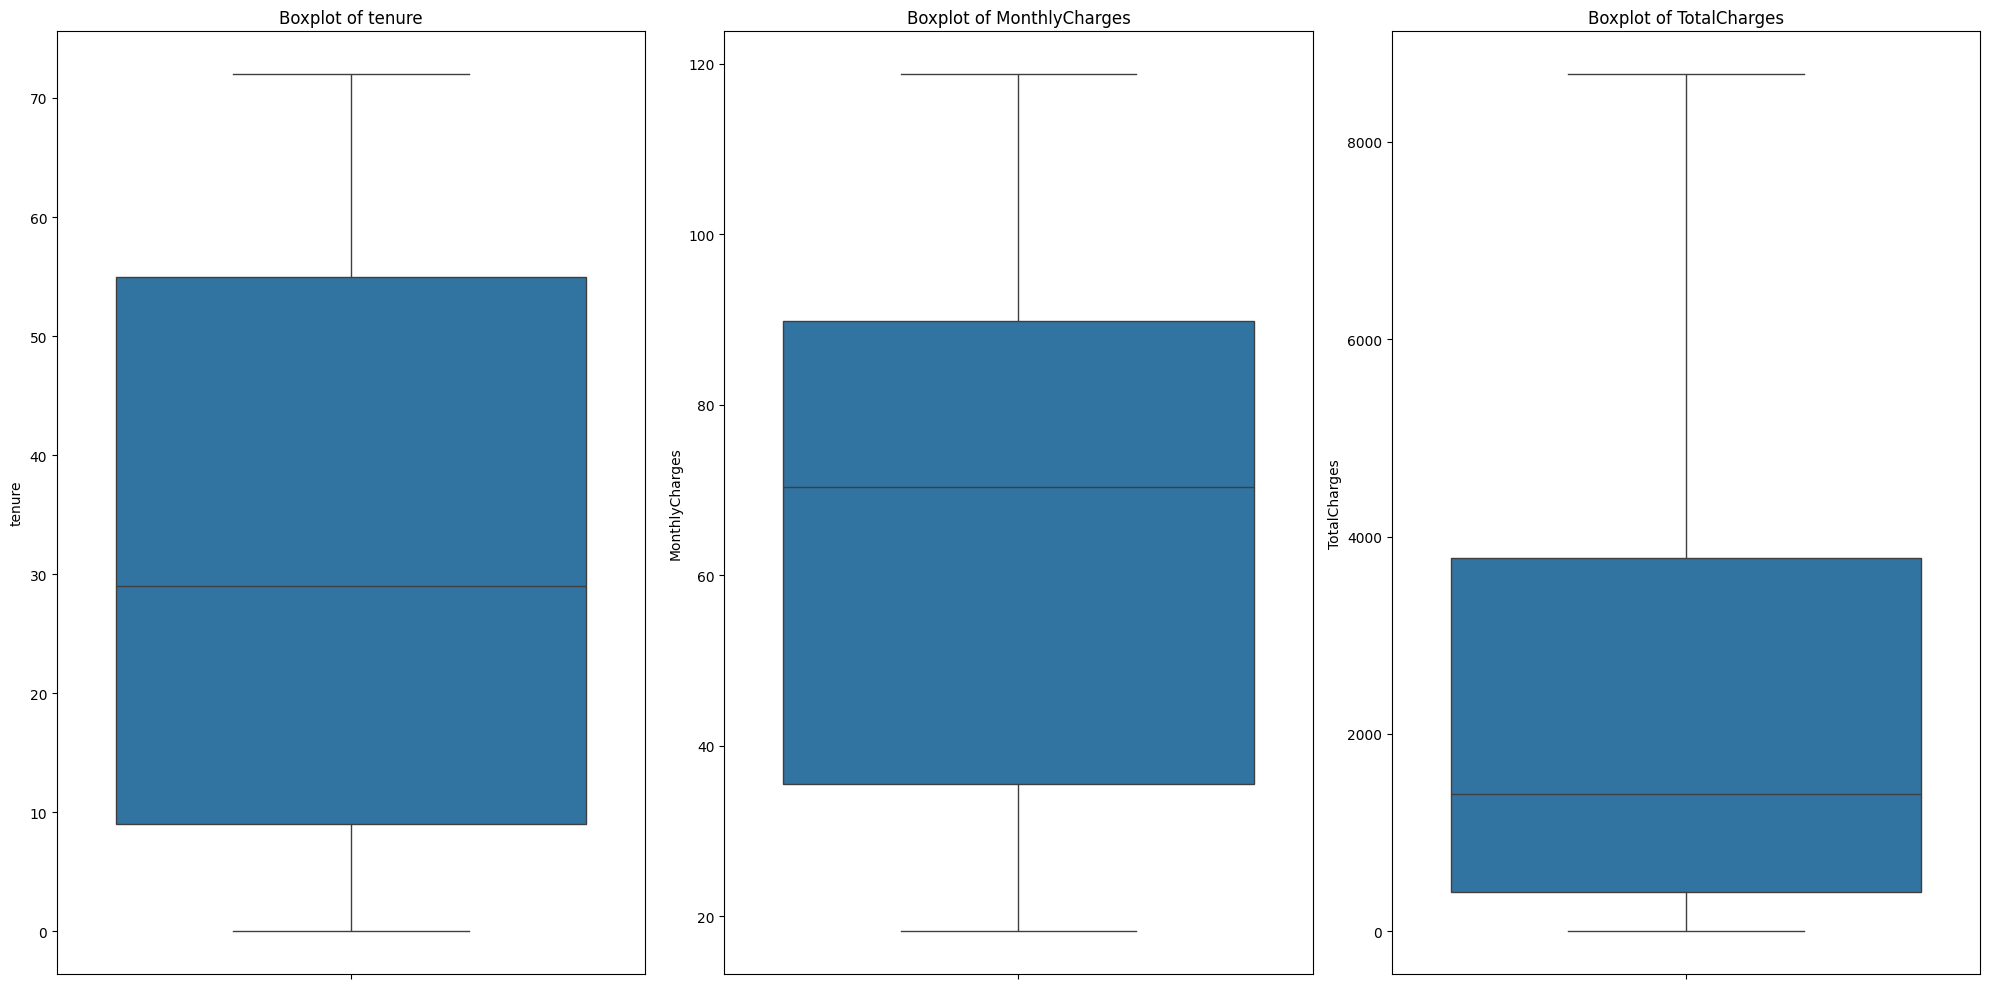

In [26]:
t = 1
for i in num:
    plt.subplot(1,3,t)
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    t +=1
plt.tight_layout()
plt.show()

In [27]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [28]:
print('tenure-------------',df['tenure'].skew(),'\nMonthlyCharges-----', df['MonthlyCharges'].skew(),'\nTotalCharges-------', df['TotalCharges'].skew())

tenure------------- 0.2395397495619829 
MonthlyCharges----- -0.22052443394398033 
TotalCharges------- 0.963234654832277


In [29]:
df[cat].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


<font size = 4px color = #00FF00>Inference</font>
* There are nearly 7000 rows with 21 columns
* Dropped customer ID for analysis
* Treated blanks in totalcharges with ), as their respective tenure is 0
* converted pre encoded senior citizen column(0/1) to categiric column
* No evident outliers and no null values
* the numeic columns are seems to be skewed

<font color = #00FFFF size = 6px><b>Deep Analysis</font>

### Univariate Analysis

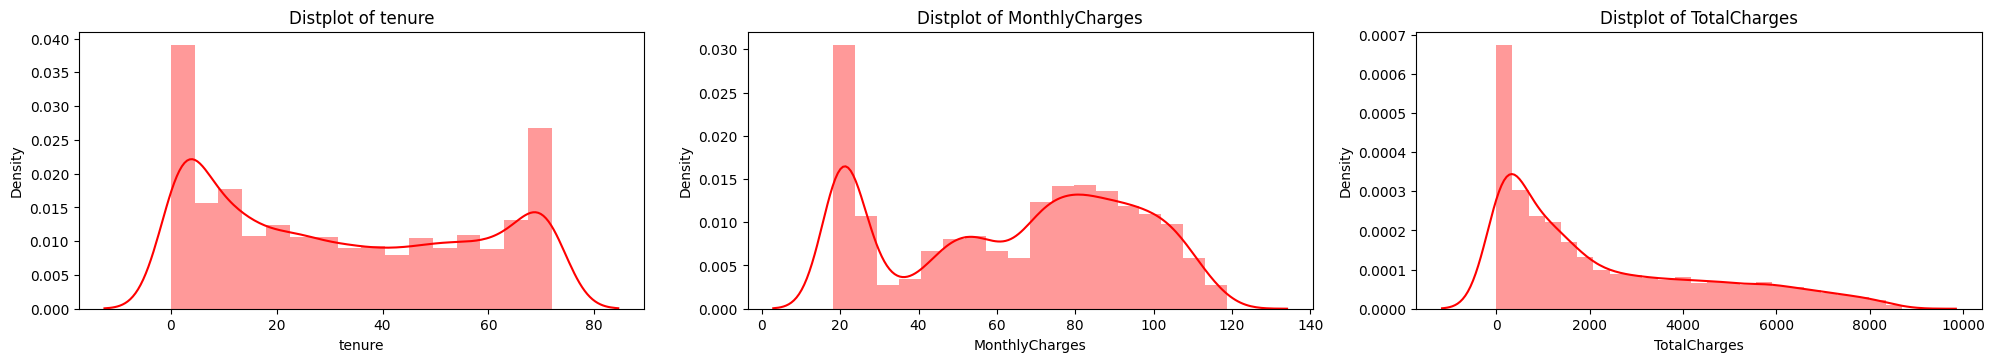

In [31]:
t = 1
for i in num:
    plt.subplot(3,3,t)
    sns.distplot(df[i],color = 'red')
    plt.title(f'Distplot of {i}')
    t +=1
plt.tight_layout()
plt.show()

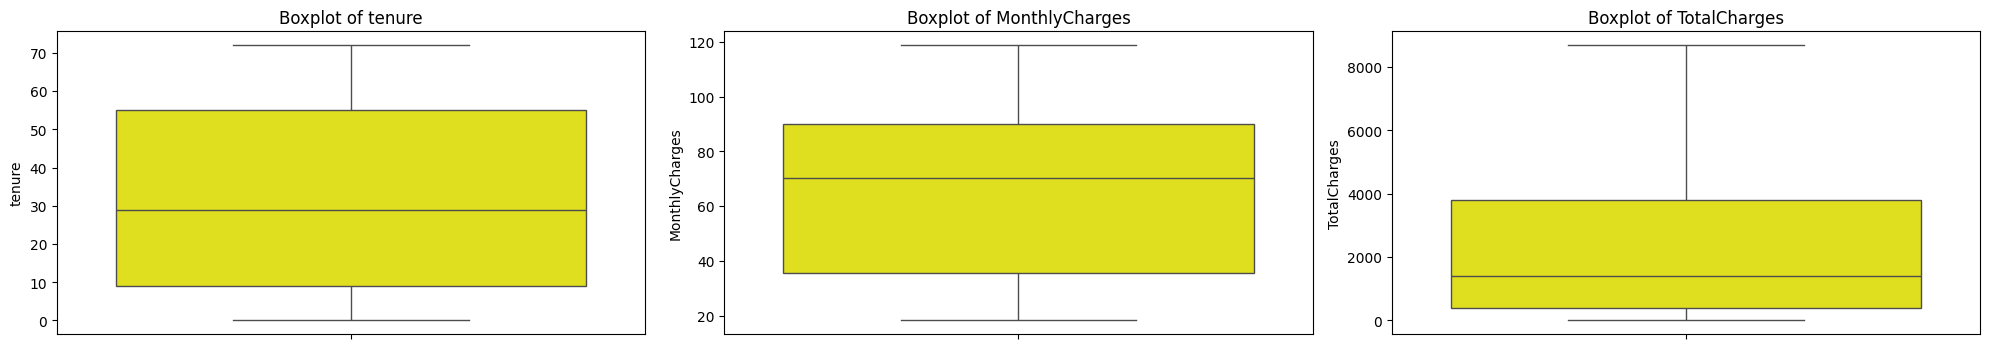

In [32]:
t = 1
for i in num:
    plt.subplot(3,3,t)
    sns.boxplot(df[i],color = 'yellow')
    plt.title(f'Boxplot of {i}')
    t +=1
plt.tight_layout()
plt.show()

<font size = 4px color = #00FF00>Inference</font>
* Tenure --> Slightly right skewed and many customers with tenure value between 0 to 10
* MonthlyCharges --> Slightly left skewed and many customers with tenure value between 20 to 30

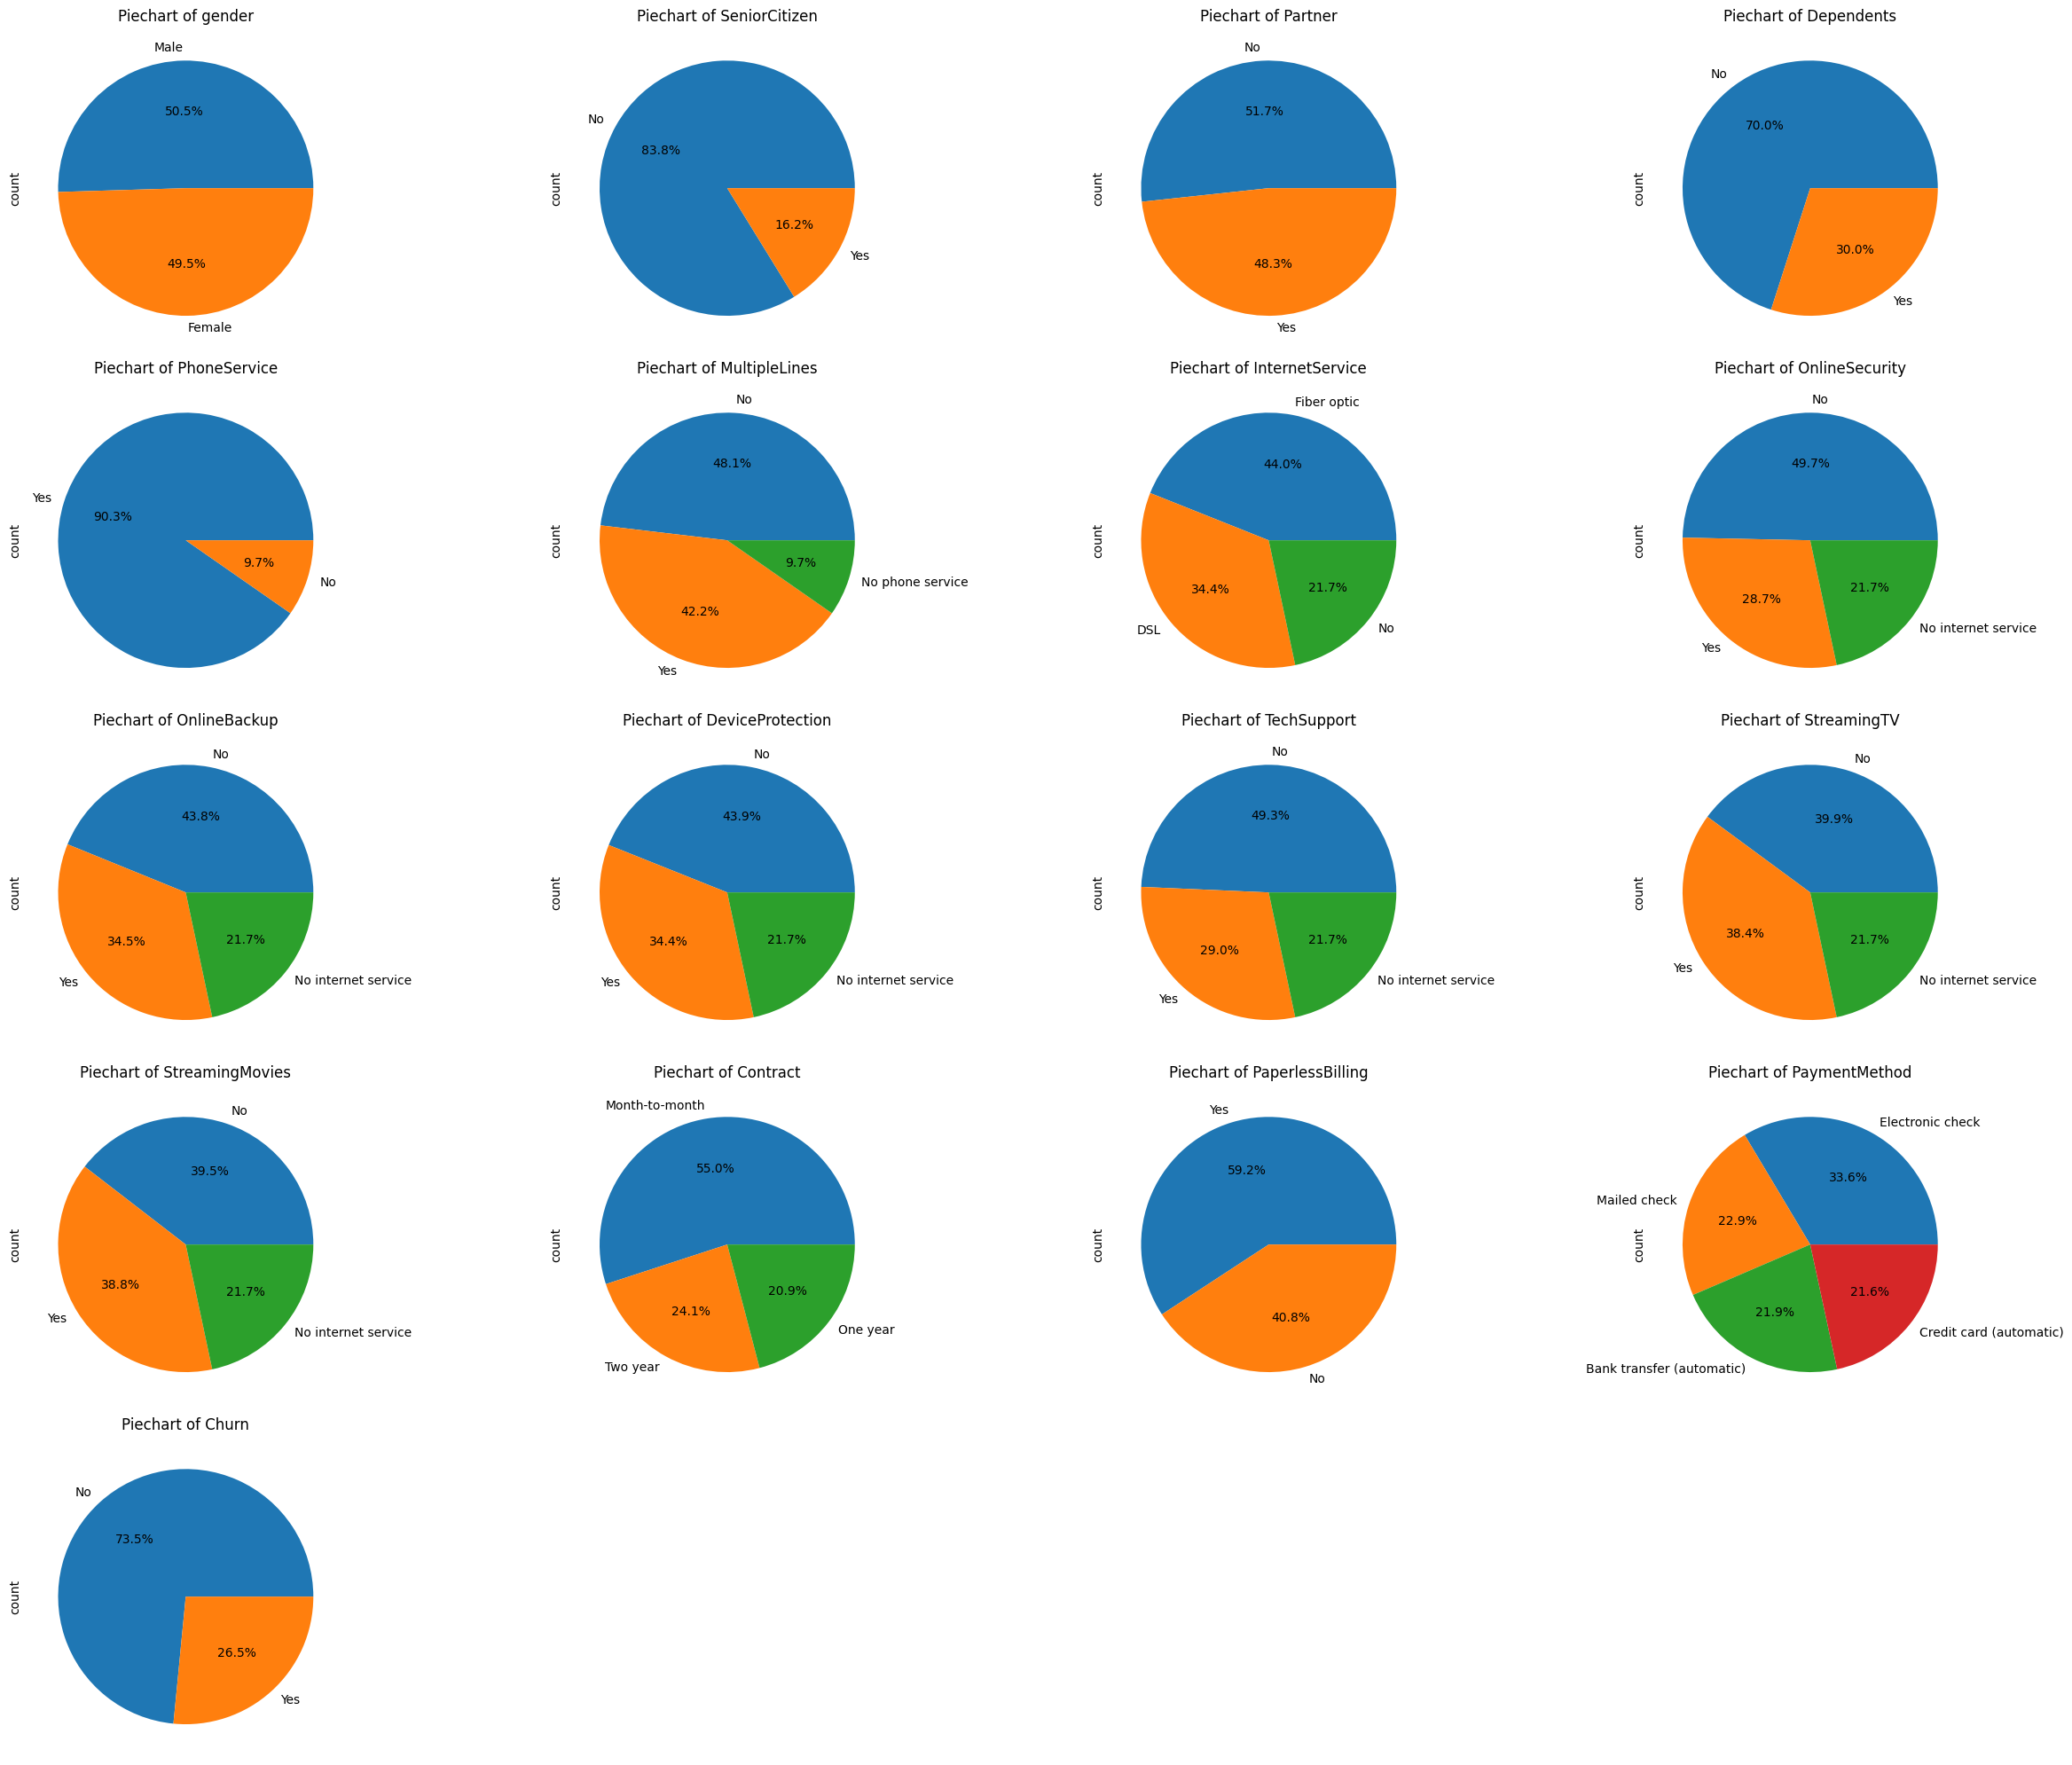

In [35]:
t = 1
with plt.rc_context({'font.size': 10, 'figure.figsize': (25, 20)}):
    for i in cat:
        plt.subplot(5,4,t)
        df[i].value_counts().plot(kind='pie',autopct = '%.1f%%')
        plt.title(f'Piechart of {i}')
        t+=1
plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Num V/s Num

In [37]:
df[num].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


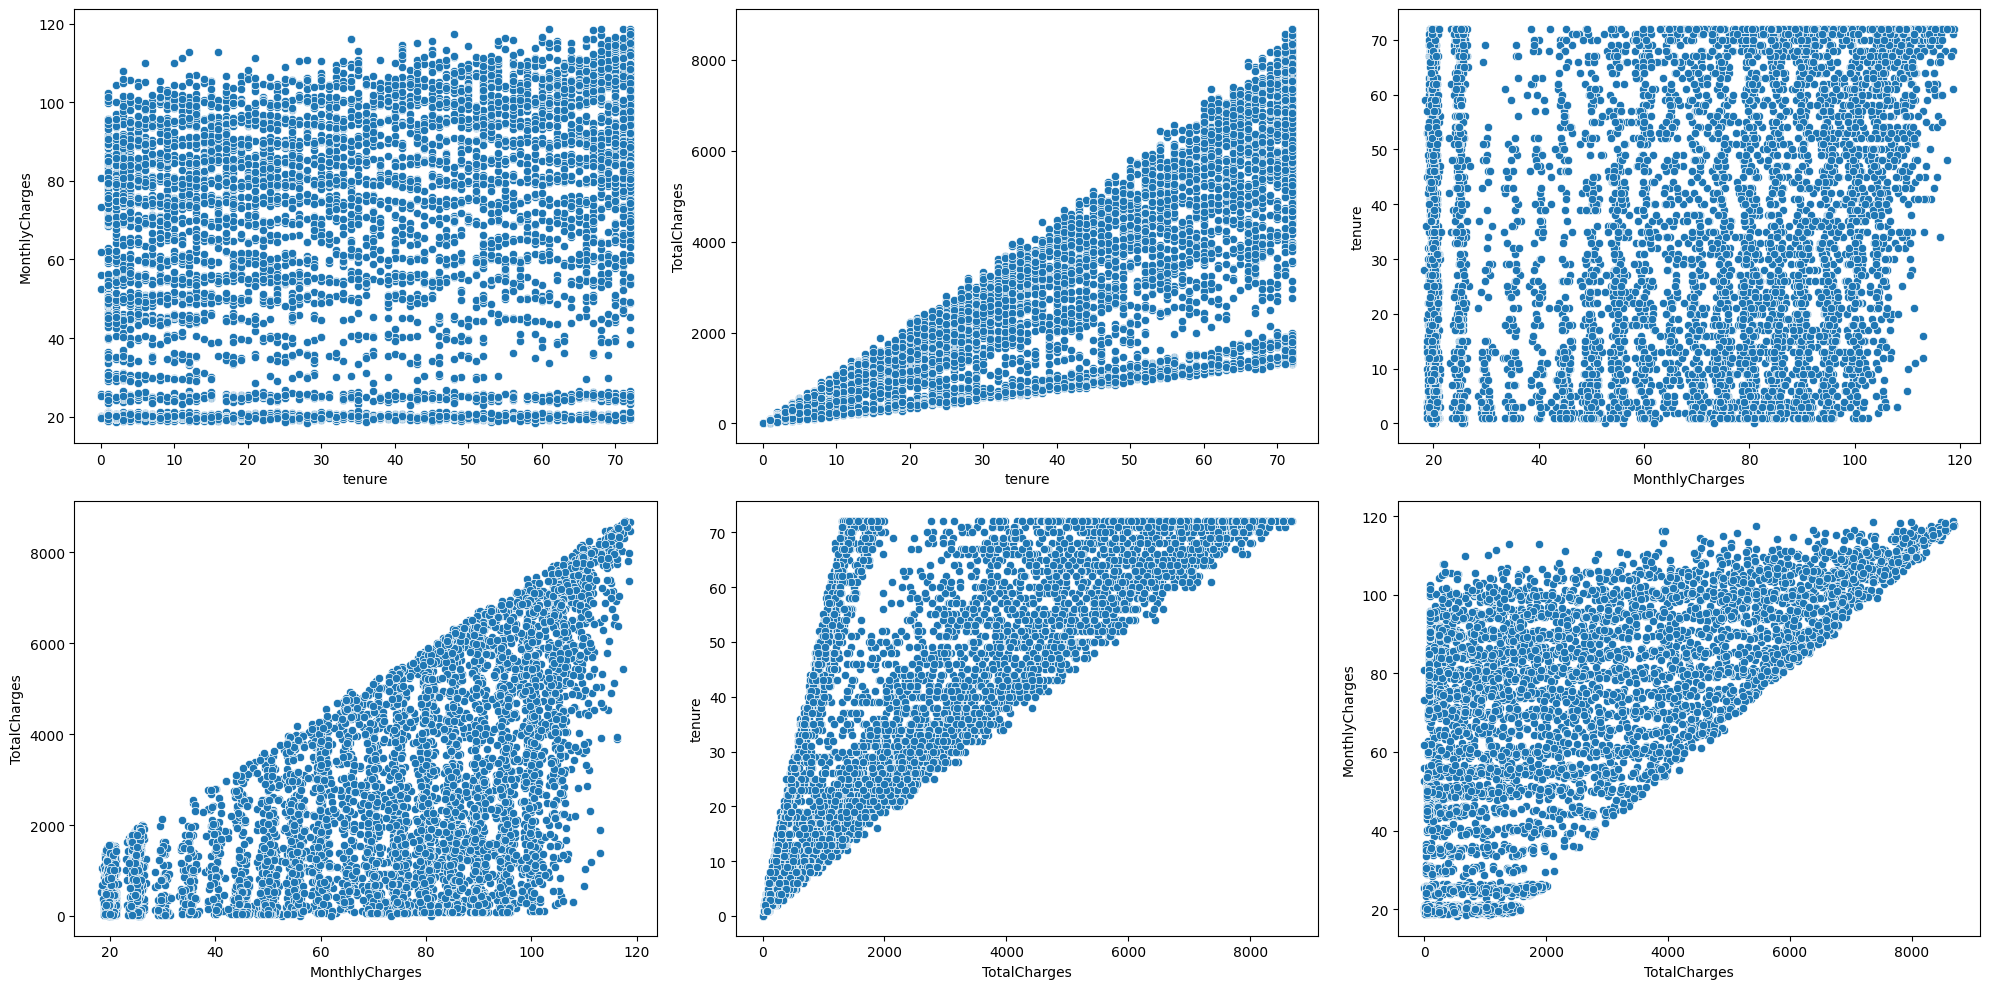

In [38]:
t = 1
for i in num:
    for j in num:
        if i!=j: # to ignore comparing column to itself
            plt.subplot(2,3,t)
            sns.scatterplot(x=df[i], y = df[j])
            t+=1
plt.tight_layout()
plt.show()

#### Num V/s cat

In [39]:
t = 1
for i in num:
    print(f'Mean {i} for churn column')
    print(df.groupby('Churn')[i].mean())
    print('----------------------------')

Mean tenure for churn column
Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64
----------------------------
Mean MonthlyCharges for churn column
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64
----------------------------
Mean TotalCharges for churn column
Churn
No     2549.911442
Yes    1531.796094
Name: TotalCharges, dtype: float64
----------------------------


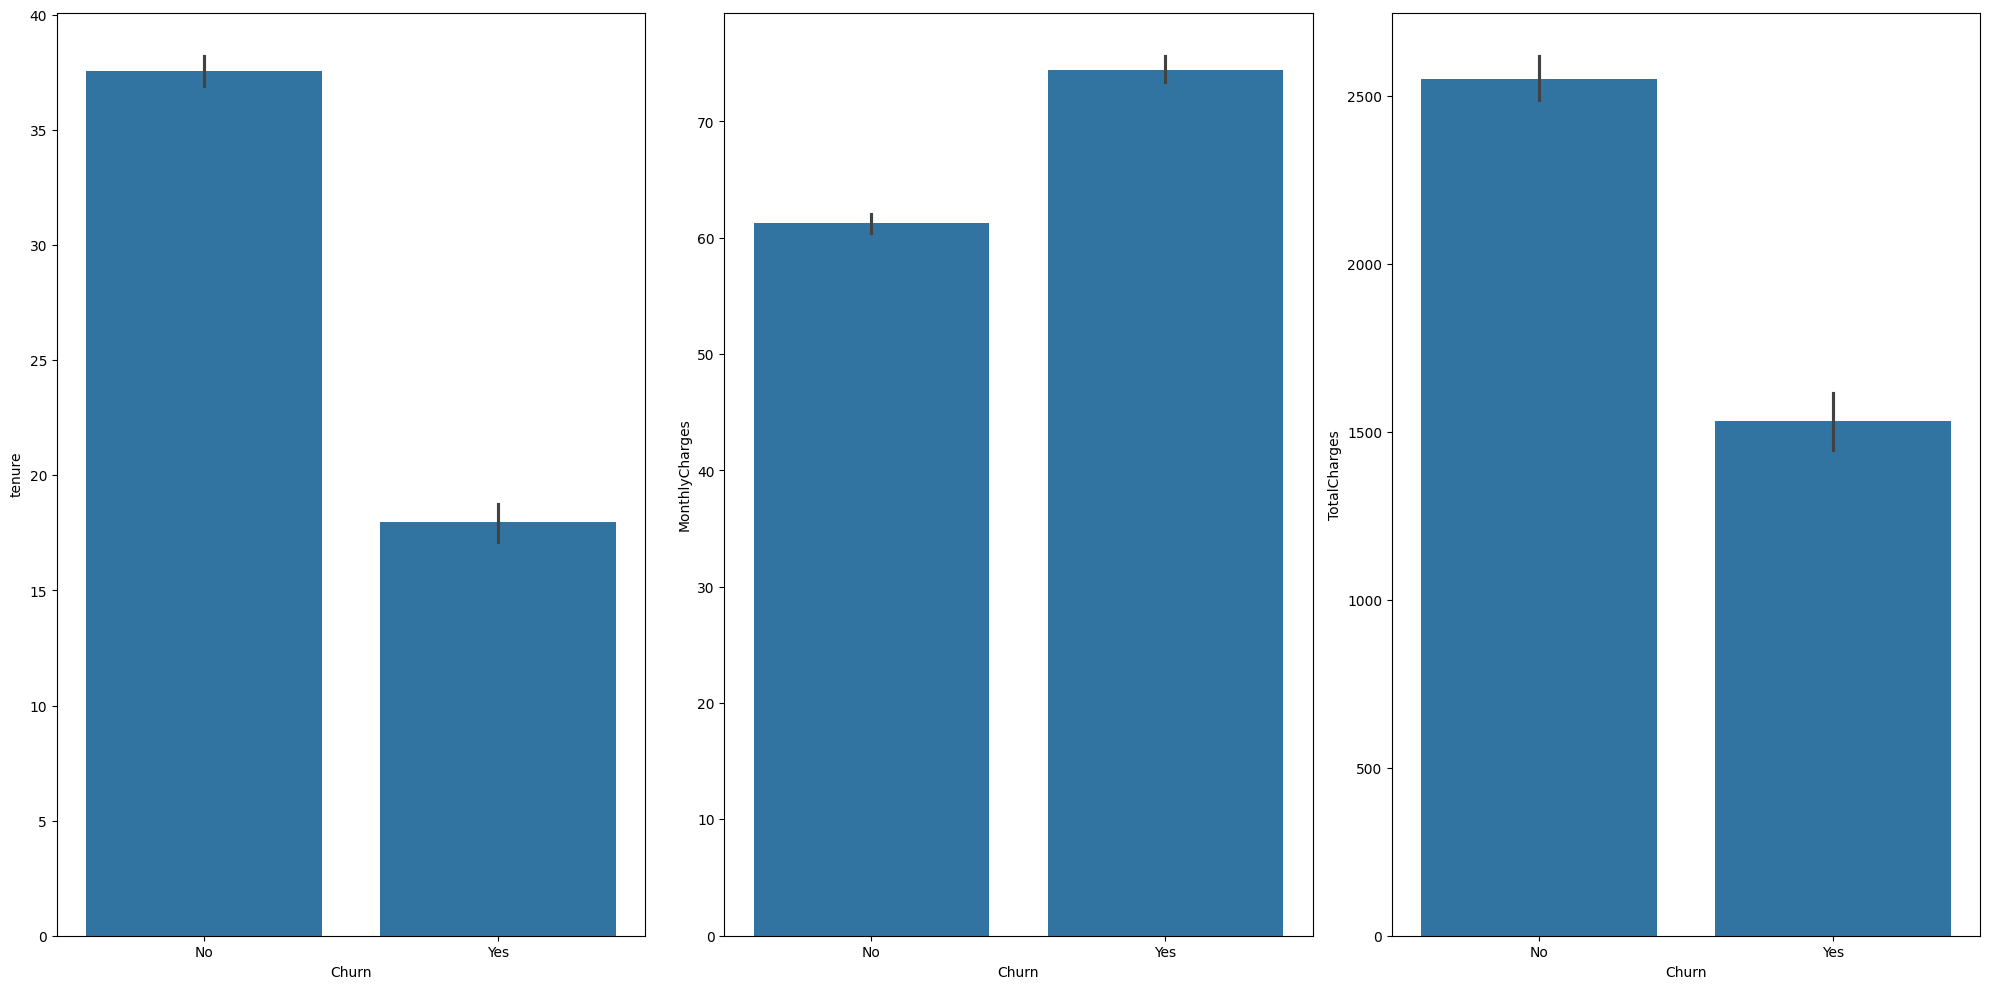

In [40]:
t = 1
for i in num:
    plt.subplot(1,3,t)
    sns.barplot(x = df['Churn'], y=df[i])
    t+=1
plt.tight_layout()
plt.show()

#### Cat v/s cat (churn)

In [41]:
for i in cat:
    print(f'frequency summary between churn and {i} ')
    print(pd.crosstab(df['Churn'], df[i]))
    print('---------------------------------')

frequency summary between churn and gender 
gender  Female  Male
Churn               
No        2549  2625
Yes        939   930
---------------------------------
frequency summary between churn and SeniorCitizen 
SeniorCitizen    No  Yes
Churn                   
No             4508  666
Yes            1393  476
---------------------------------
frequency summary between churn and Partner 
Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669
---------------------------------
frequency summary between churn and Dependents 
Dependents    No   Yes
Churn                 
No          3390  1784
Yes         1543   326
---------------------------------
frequency summary between churn and PhoneService 
PhoneService   No   Yes
Churn                  
No            512  4662
Yes           170  1699
---------------------------------
frequency summary between churn and MultipleLines 
MultipleLines    No  No phone service   Yes
Churn                                      
N

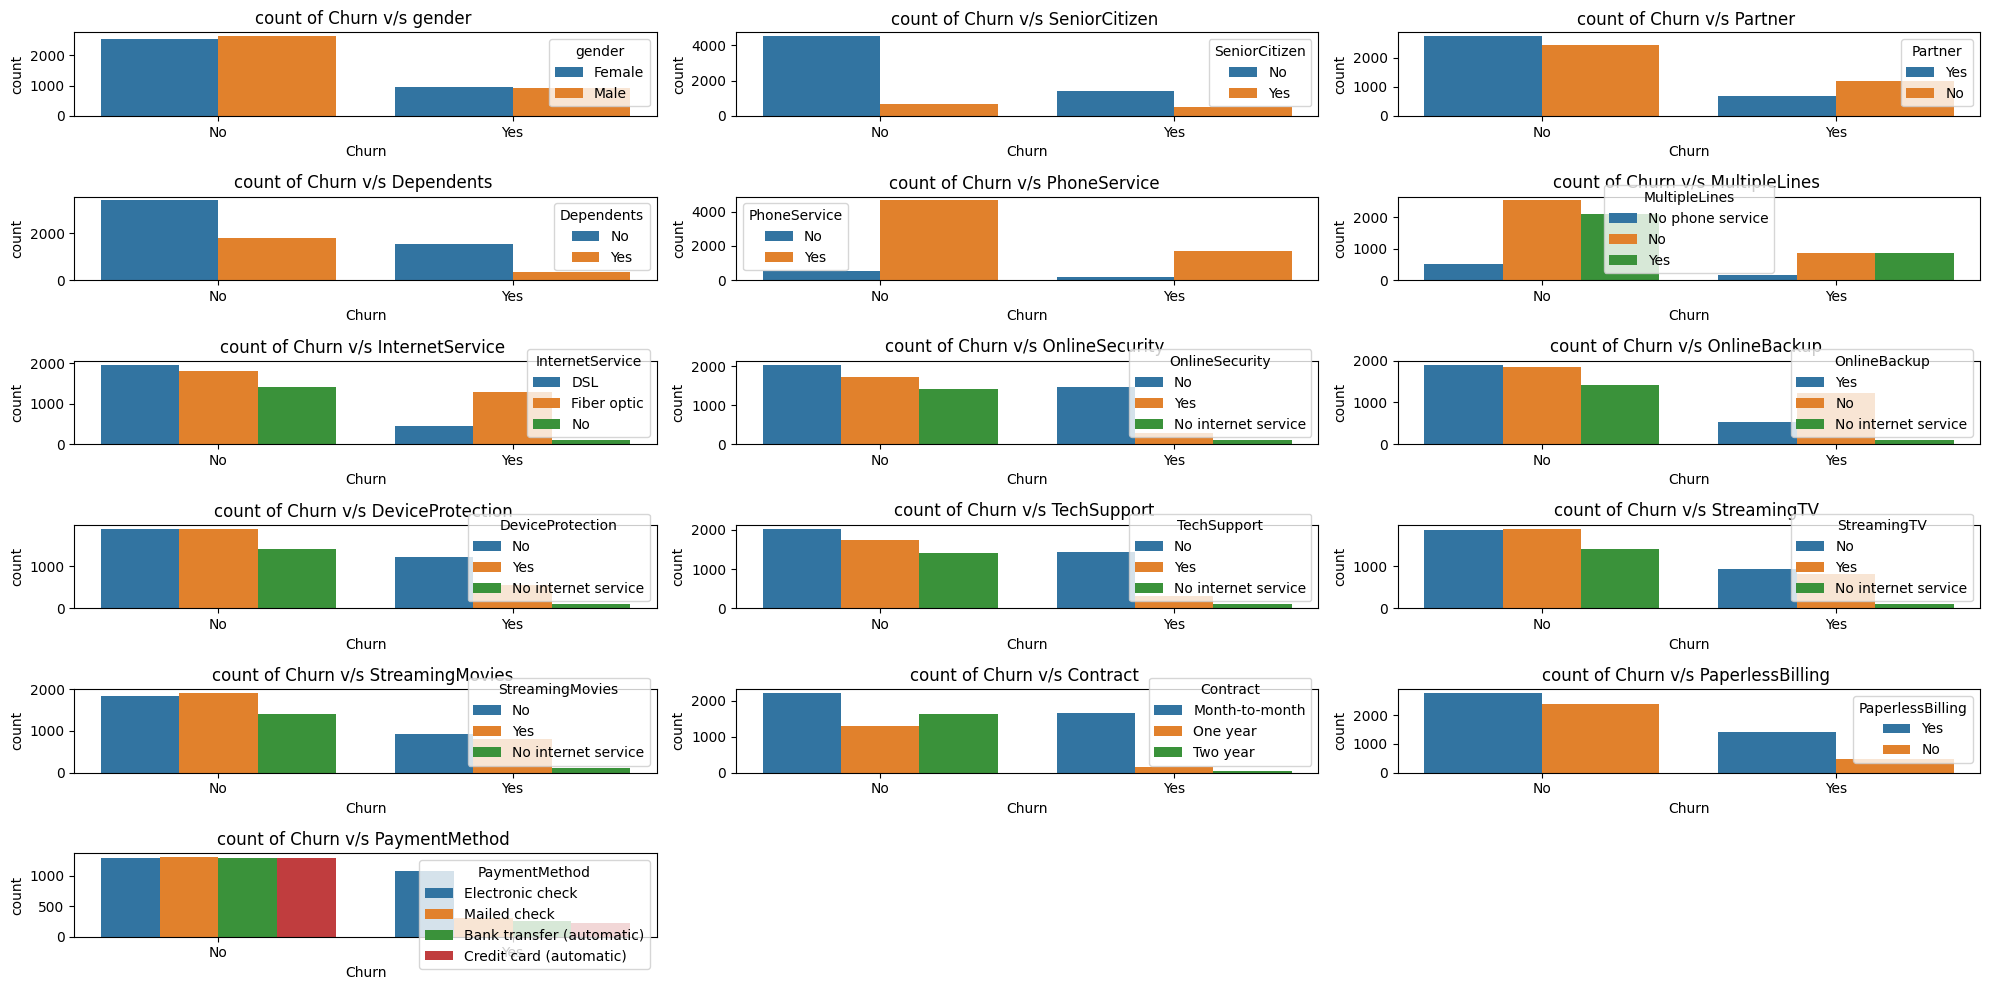

In [42]:
t = 1
for i in cat:
    if i != 'Churn':
        plt.subplot(6,3,t)
        sns.countplot(x = df['Churn'], hue = df[i]).plot(kind='bar')
        plt.title(f'count of Churn v/s {i} ')
        t+=1
plt.tight_layout()
plt.show()

### Multivariate Analysis

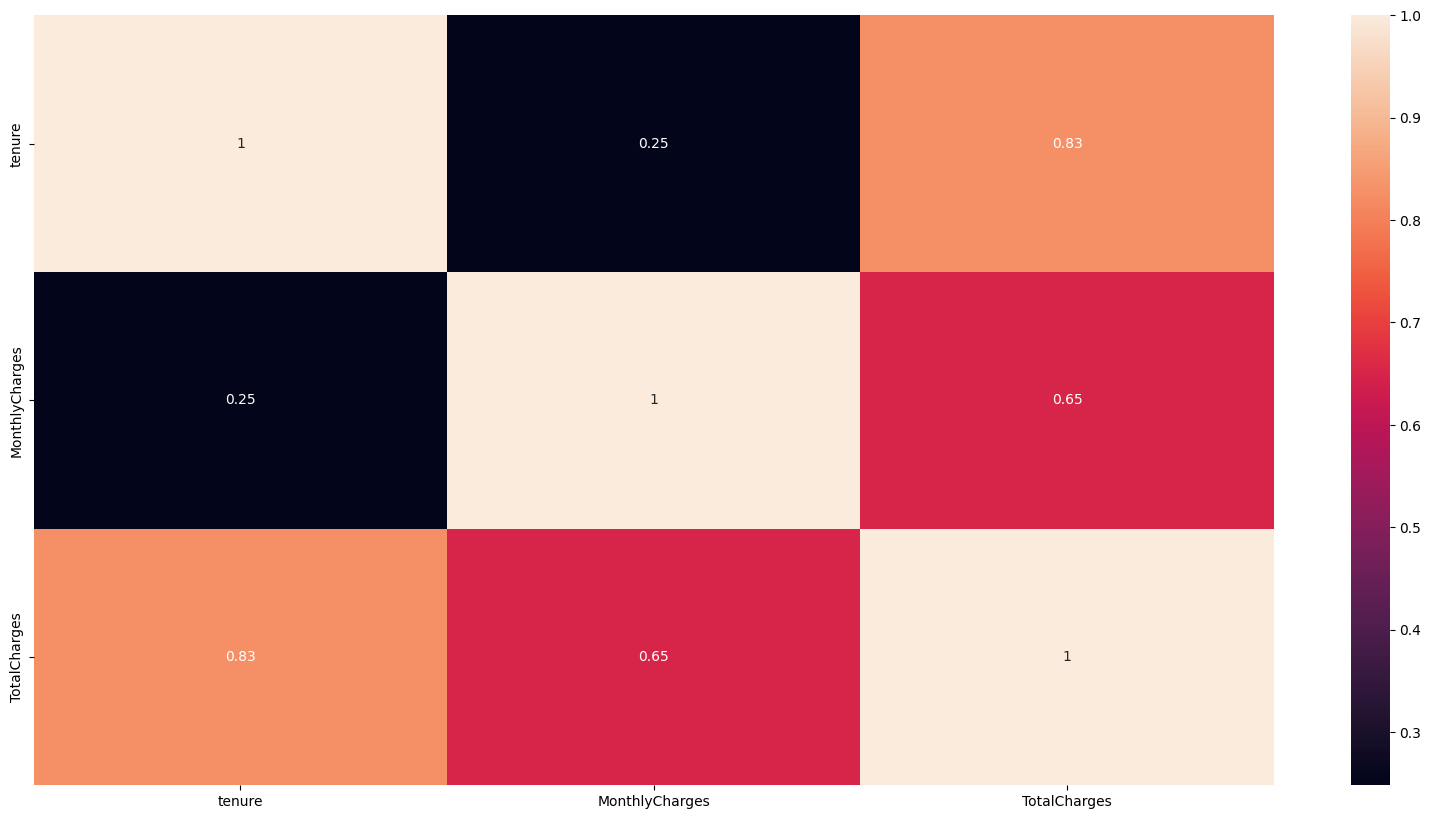

In [43]:
sns.heatmap(df[num].corr(), annot = True)
#cmap = 'plasma','magma','viridis','Greens','Blues','Oranges','coolwarm','cividis'
plt.show()

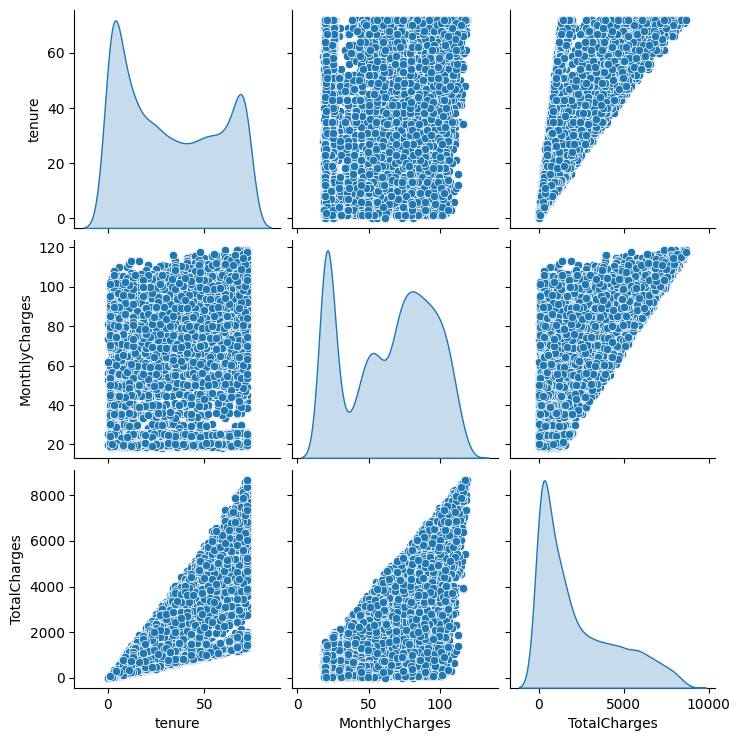

In [44]:
sns.pairplot(df[num], diag_kind='kde')
plt.show()

<font color = #00FFFF size = 6px><b>Statestical Inference

## 1. Check whether gender has any dependency on churn

#### Chi Square test for independence

* Ho: Gender and churn are independent
* Ha: Gender and churn are dependent

In [45]:
f_obs = pd.crosstab(df['Churn'], df['gender'])
f_obs

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [46]:
from scipy import stats

In [47]:
stats.chi2_contingency(f_obs)

Chi2ContingencyResult(statistic=np.float64(0.4840828822091383), pvalue=np.float64(0.48657873605618596), dof=1, expected_freq=array([[2562.38989067, 2611.61010933],
       [ 925.61010933,  943.38989067]]))

In [48]:
chi_critic = stats.chi2.isf(0.05, 1)
chi_critic

np.float64(3.8414588206941285)

### Conclusion

<font color=#BDB76B>* Pvalue (0.486) > Significance value (0.05) ----> Fails to Reject Ho<br>
<font color=#BDB76B>* Stats value (0.48) < Critical value (3.84) ----> Fails to Reject Ho

<font color=#00CED1>Gender and churn are independent

## 2. Check whether tenure is statistically significant in predicting churn

#### two sample T test

In [49]:
sam1 = df[df['Churn'] == 'Yes']['tenure']
sam2 = df[df['Churn'] == 'No']['tenure']

* Ho: tenure is not statistically significant in predicting churn
* Ha: tenure is statistically significant in predicting churn
-----------------------------------------------------------------------

* Ho: tenure and churn are independent
* Ha: tenure and churn are dependent
-----------------------------------------------------------------------

* Ho: means are equal
* Ha: means are not equal

In [50]:
stats.ttest_ind(sam1, sam2)

TtestResult(statistic=np.float64(-31.57955051135377), pvalue=np.float64(7.99905796059022e-205), df=np.float64(7041.0))

In [63]:
stats.t.isf(0.05, df = 7041)

np.float64(1.645070069342061)

### Conclusion

<font color=#BDB76B>* Pvalue (0.000) < Significance value (0.05) ----> Reject Ho<br>
<font color=#BDB76B>* Stats value (31.57) > Critical value (1.96) ----> Reject Ho

<font color=#00CED1>tenure is statistically significant in predicting churn

## 3. Check whether contract has any dependency with monthly charges

#### ANOVA test

In [64]:
s1 = df[df['Contract']=='Month-to-month']['MonthlyCharges']
s2 = df[df['Contract']=='One year']['MonthlyCharges']
s3 = df[df['Contract']=='Two year']['MonthlyCharges']

* Ho: contract has no dependency with monthly charges
* Ha: contract has dependency with monthly charges

In [67]:
dfb = 2
dfw = len(df['Contract'])-3
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=np.float64(20.828045474730267), pvalue=np.float64(9.575270975935273e-10))

In [68]:
stats.f.isf(0.05/2,dfb, dfw)

np.float64(3.6908130601434244)

### Conclusion

<font color=#BDB76B>* Pvalue (0.000) < Significance value (0.05) ----> Reject Ho<br>
<font color=#BDB76B>* Stats value (20.82) > Critical value (3.69) ----> Reject Ho

<font color=#00CED1>contract has dependency with monthly charges

In [69]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [71]:
pairwise_tukeyhsd( df['MonthlyCharges'],df['Contract']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Month-to-month,One year,-1.3499,0.3056,-3.5029,0.8032,False
Month-to-month,Two year,-5.6281,0.0,-7.6764,-3.5797,True
One year,Two year,-4.2782,0.0002,-6.7838,-1.7726,True


## 4. Check tenure has any impact on monthly charges

* Ho: tenure has no impact on monthly charges
* Ha: tenure has impact on monthly charges

In [72]:
stats.pearsonr(df['tenure'], df['MonthlyCharges'])

PearsonRResult(statistic=np.float64(0.24789985628615008), pvalue=np.float64(4.094044991499666e-99))

### Conclusion

<font color=#BDB76B>* Pvalue (0.000) < Significance value (0.05) ----> Reject Ho<br>

<font color=#00CED1>  tenure has impact on monthly charges

<font color = #00FFFF size = 6px><b>Encoding

In [216]:
df1 = df.copy()
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [218]:
for i in cat:
    print(i)
    print(df[i].unique())
    print('--------------------------')

gender
['Female' 'Male']
--------------------------
SeniorCitizen
['No' 'Yes']
--------------------------
Partner
['Yes' 'No']
--------------------------
Dependents
['No' 'Yes']
--------------------------
PhoneService
['No' 'Yes']
--------------------------
MultipleLines
['No phone service' 'No' 'Yes']
--------------------------
InternetService
['DSL' 'Fiber optic' 'No']
--------------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
--------------------------
OnlineBackup
['Yes' 'No' 'No internet service']
--------------------------
DeviceProtection
['No' 'Yes' 'No internet service']
--------------------------
TechSupport
['No' 'Yes' 'No internet service']
--------------------------
StreamingTV
['No' 'Yes' 'No internet service']
--------------------------
StreamingMovies
['No' 'Yes' 'No internet service']
--------------------------
Contract
['Month-to-month' 'One year' 'Two year']
--------------------------
PaperlessBilling
['Yes' 'No']
--------------------------
PaymentM

**One hot encoding**

In [219]:
one_hot = ['InternetService','PaymentMethod']

In [ ]:
pd.get_dummies(data = df1, columns=one_hot, dtype=int) # one hot encoding

In [222]:
df1 = pd.get_dummies(data = df1, columns=one_hot, dtype = int, drop_first=True) # N-1 dummy encoding

**Frequency encoding**

In [237]:
freq = df1['gender'].value_counts(normalize = True)

In [238]:
df1['gender'] = df1['gender'].replace(freq)

In [239]:
df1['gender'].unique()

array([0.4952435, 0.5047565])

**Ordinal encoding**

In [240]:
from sklearn.preprocessing import OrdinalEncoder

In [241]:
ordinal = OrdinalEncoder(categories=[['Month-to-month','One year','Two year']])

In [ ]:
df1['Contract']=ordinal.fit_transform(df1[['Contract']])

**Label Encoding**

In [235]:
cat1 = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',  'Churn']

In [236]:
from sklearn.preprocessing import LabelEncoder

In [243]:
l = LabelEncoder()
for i in cat1:
    df1[i] = l.fit_transform(df1[i])

In [244]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   float64
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

<font color = #00FFFF size = 6px><b>Transformation</font>

In [245]:
df1[num].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

Transform total charges using Yoe johnson  (column has 0 values)

In [246]:
from sklearn.preprocessing import PowerTransformer
p = PowerTransformer()

In [247]:
df['TotalCharges'] = p.fit_transform(df[['TotalCharges']])

In [248]:
df['TotalCharges'].skew()

np.float64(-0.14612057493813246)

<font color = #00FFFF size = 6px><b>Scaling</font>

### Standard scaling

In [253]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [254]:
s = StandardScaler()

df1['tenure'] = s.fit_transform(df1[['tenure']])

In [256]:
m = MinMaxScaler()

df1['MonthlyCharges'] = m.fit_transform(df1[['MonthlyCharges']])